# Lab 3

## Step 1

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Step 2

In [2]:
index_df = pd.read_csv("Chinese_MINST_Dataset/chinese_mnist.csv")
def create_file_name(x):
    filename = f"input_{x.iloc[0]}_{x.iloc[1]}_{x.iloc[2]}.jpg"
    return filename


index_df["file"] = index_df.apply(create_file_name, axis=1)
image_path = 'Chinese_MINST_Dataset/data/data/'
images = []
labels = []
for index, row in index_df.iterrows():
    image = image_path + row["file"]
    img = cv2.imread(image)
    images.append(img)
    label = int(row["code"]) - 1
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

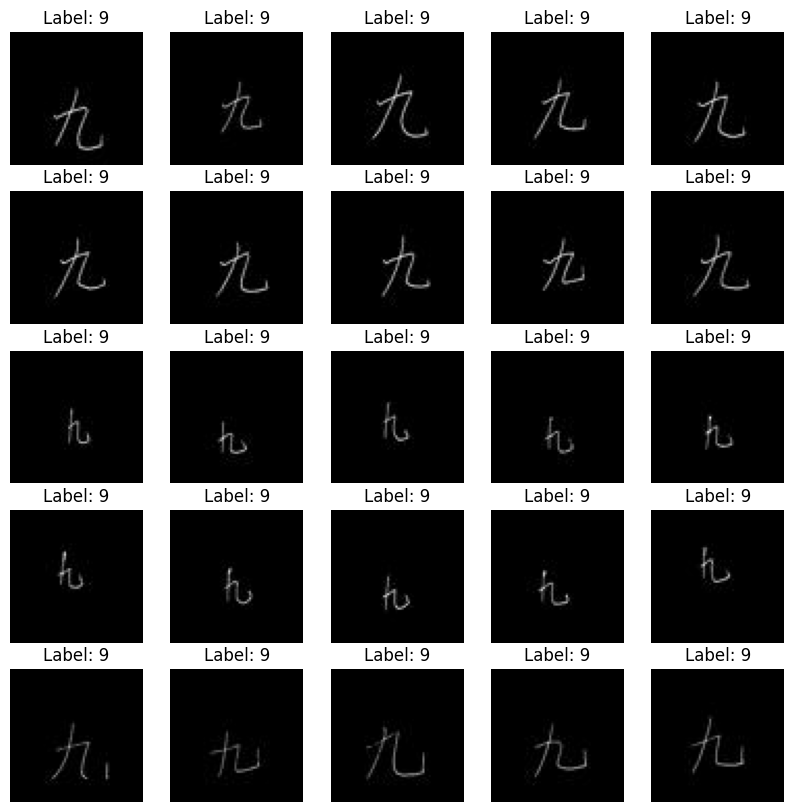

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f'Label: {labels[i]}')
    plt.axis('off')
plt.show()

## Step 3

In [4]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=1000, train_size=5000, random_state=1)
train_index, test_index = next(sss.split(images, labels))
X_train, X_test = images[train_index], images[test_index]
y_train, y_test = labels[train_index], labels[test_index]

## Step 4

In [5]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

## Step 5

In [6]:
knn = KNeighborsClassifier(n_neighbors=3)
dt = DecisionTreeClassifier()
sgd = SGDClassifier(max_iter=250)

## Step 6

In [7]:
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
sgd.fit(X_train, y_train)

SGDClassifier(max_iter=250)

## Step 7

In [8]:
def evaluate_classifier(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, cm, report

In [9]:
# Evaluate KNN
knn_metrics = evaluate_classifier(knn, X_test, y_test)
print("KNN Classifier:")
print(f"Accuracy: {knn_metrics[0]}")
print(f"Precision: {knn_metrics[1]}")
print(f"Recall: {knn_metrics[2]}")
print(f"F1 Score: {knn_metrics[3]}")
print(f"Confusion Matrix:\n{knn_metrics[4]}")
print(f"Classification Report:\n{knn_metrics[5]}")

# Evaluate Decision Tree
dt_metrics = evaluate_classifier(dt, X_test, y_test)
print("\nDecision Tree Classifier:")
print(f"Accuracy: {dt_metrics[0]}")
print(f"Precision: {dt_metrics[1]}")
print(f"Recall: {dt_metrics[2]}")
print(f"F1 Score: {dt_metrics[3]}")
print(f"Confusion Matrix:\n{dt_metrics[4]}")
print(f"Classification Report:\n{dt_metrics[5]}")

# Evaluate SGD
sgd_metrics = evaluate_classifier(sgd, X_test, y_test)
print("\nSGD Classifier:")
print(f"Accuracy: {sgd_metrics[0]}")
print(f"Precision: {sgd_metrics[1]}")
print(f"Recall: {sgd_metrics[2]}")
print(f"F1 Score: {sgd_metrics[3]}")
print(f"Confusion Matrix:\n{sgd_metrics[4]}")
print(f"Classification Report:\n{sgd_metrics[5]}")

KNN Classifier:
Accuracy: 0.333
Precision: 0.5413047963428311
Recall: 0.33276044022312684
F1 Score: 0.3403761793931033
Confusion Matrix:
[[35  9  3  4  1  2  4  0  0  0  1  1  0  7  0]
 [ 0 63  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 32 30  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 30 22 14  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 28  8  7 11  2  3  1  0  0  2  0  0  1  0]
 [ 0 18 24 12  0 10  1  0  0  1  0  0  0  1  0]
 [ 3 41  5  0  0  0 13  0  3  0  0  0  1  0  0]
 [ 2 29  6  3  0  1  3 14  1  2  5  0  0  0  0]
 [ 0 12  1  0  0  0  1  0 52  0  1  0  0  0  0]
 [ 2 25  4  1  0  5  9  3  1  9  2  0  0  5  1]
 [ 0 32  1  1  0  0  2  1  0  0 23  0  6  0  0]
 [ 3 22  7  7  3  2  3  2  0  1  2  8  0  7  0]
 [ 0 22  9  1  0  0  3  0  0  0 11  0 21  0  0]
 [ 1 34  0  1  1  0  8  0  0  1  1  0  0 20  0]
 [ 1 29  8  3  3  7  1  2  2  0  1  0  0  0 10]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.52      0.59        67
          